In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('labels.csv')
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
breed = data.breed
breed.head()

0         boston_bull
1               dingo
2            pekinese
3            bluetick
4    golden_retriever
Name: breed, dtype: object

In [4]:
counter = Counter(breed)
counter_pairs = sorted(list(map(lambda k: (counter[k], k), counter)))

In [37]:
from functools import reduce
def f(a, b):
    if type(a) is tuple:
        return a[1] + ', ' + b[1]
    return a + ', ' + b[1]
format = lambda l: reduce(f, l)

print(f'Há {len(counter)} raças diferentes de cachorros')
print(f'As 5 mais frequentes são: {format(counter_pairs[115:])}')

Há 120 raças diferentes de cachorros
As 5 mais frequentes são: bernese_mountain_dog, entlebucher, afghan_hound, maltese_dog, scottish_deerhound


Text(0, 0.5, 'Quantidade')

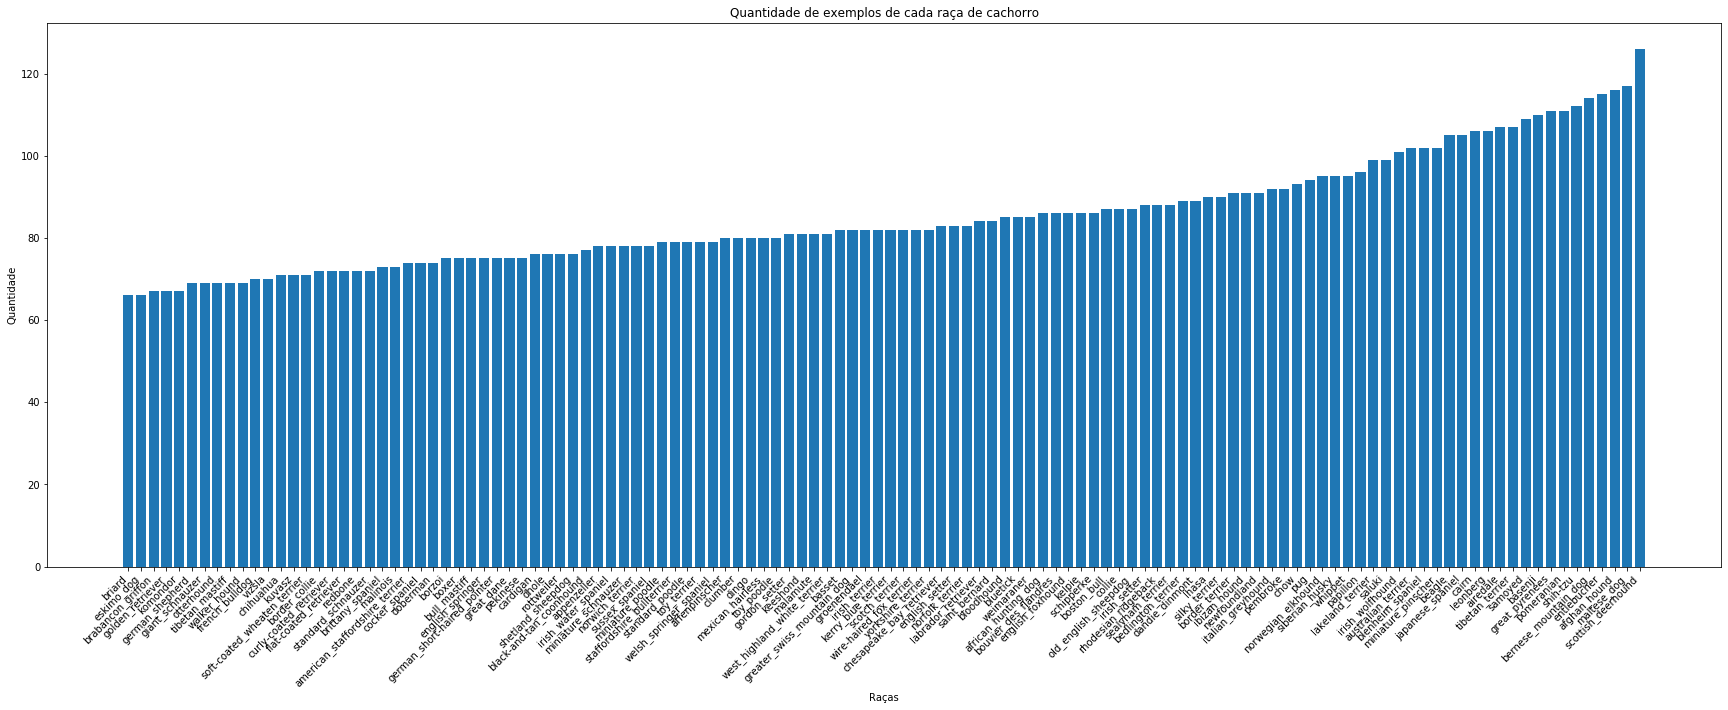

In [22]:
x = [ p[1] for p in counter_pairs ]
y = [ p[0] for p in counter_pairs ]

fig, ax = plt.subplots(1,1, figsize=(30, 10))
ax.set_xticklabels(x, rotation=45, ha='right')
ax.bar(x, y)
plt.title('Quantidade de exemplos de cada raça de cachorro')
plt.xlabel('Raças')
plt.ylabel('Quantidade')